# Airport Analysis

1. Atlanta ariport is the busiest airport compared to other airports, therefore more delays can be expected.
2. Most of the delays are caused due to national aviation systems and late arrivals.
3. From the analysis, Delta airlines has more number of flights and has maintained on-time arrival percentage between (80-90)%.


In [491]:
#Dependencies

#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar

import matplotlib.style as style
style.available
style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [492]:
# reading all the dataframes 
data_atl = pd.read_csv('airline_details_ATL.csv')
data_lax = pd.read_csv('airline_details_LAX.csv')
data_chicago = pd.read_csv('Chicago_Airline_Data.csv')
data_jfk = pd.read_csv('JFK_2010_2018_Dataset.csv')



In [493]:
data_atl.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067.0,271.0,42.76,9.40,...,62.78,46.0,4.0,15932.0,4225.0,1098.0,6092.0,0.0,4517.0,NaN
1,2010,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",524.0,75.0,31.23,8.31,...,16.04,21.0,2.0,3825.0,1613.0,449.0,818.0,0.0,945.0,NaN
2,2010,1,AS,Alaska Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",31.0,2.0,0.00,0.00,...,0.00,0.0,0.0,93.0,0.0,0.0,93.0,0.0,0.0,NaN
3,2010,1,CO,Continental Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",148.0,30.0,7.30,1.55,...,5.24,2.0,0.0,1472.0,227.0,39.0,901.0,32.0,273.0,NaN
4,2010,1,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",12706.0,1925.0,463.26,73.66,...,452.63,370.0,37.0,136387.0,46261.0,7968.0,52617.0,77.0,29464.0,NaN


In [494]:
def clean_col(df):
    df = df.rename(columns={ ' month':'month', ' weather_ct':'weather_ct', ' arr_delay':'arr_delay',
                                 ' carrier_delay':'carrier_delay'})
    df = df[['year','month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']]
    df[df['year'] != 2019]
    return(df)



In [495]:
data_atl = clean_col(data_atl)
data_atl.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067.0,271.0,42.76,9.40,156.06,0.00,62.78,46.0,4.0
1,2010,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",524.0,75.0,31.23,8.31,19.42,0.00,16.04,21.0,2.0
2,2010,1,AS,Alaska Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",31.0,2.0,0.00,0.00,2.00,0.00,0.00,0.0,0.0
3,2010,1,CO,Continental Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",148.0,30.0,7.30,1.55,14.46,1.45,5.24,2.0,0.0
4,2010,1,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",12706.0,1925.0,463.26,73.66,933.45,2.00,452.63,370.0,37.0


In [496]:
data_atl.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,2013.834105,6.490741,2690.392747,427.195216,104.195432,12.233002,150.365370,0.419537,159.982230,32.941358,5.529321
std,2.700398,3.445313,5203.720618,777.018997,189.699636,28.101775,292.943165,0.950463,291.460253,108.053010,14.478926
min,2010.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,3.750000,147.000000,30.000000,9.835000,0.077500,10.157500,0.000000,8.180000,1.000000,0.000000
50%,2014.000000,6.000000,433.500000,87.000000,27.400000,1.670000,30.765000,0.000000,23.190000,5.000000,1.000000
75%,2016.000000,9.000000,2003.500000,359.000000,78.162500,7.107500,111.787500,0.290000,149.370000,20.000000,4.000000
max,2018.000000,12.000000,21977.000000,5268.000000,1242.160000,240.790000,2401.790000,6.460000,1583.510000,1328.000000,146.000000


In [497]:
data_atl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 15 columns):
year                1296 non-null int64
month               1296 non-null int64
carrier             1296 non-null object
carrier_name        1296 non-null object
airport             1296 non-null object
airport_name        1296 non-null object
arr_flights         1296 non-null float64
arr_del15           1296 non-null float64
carrier_ct          1296 non-null float64
weather_ct          1296 non-null float64
nas_ct              1296 non-null float64
security_ct         1296 non-null float64
late_aircraft_ct    1296 non-null float64
arr_cancelled       1296 non-null float64
arr_diverted        1296 non-null float64
dtypes: float64(9), int64(2), object(4)
memory usage: 152.0+ KB


### Flight Delays

In [498]:
# flight delays:
total_delays = data_atl['arr_del15'].sum()
total_carrier_delays = data_atl['carrier_ct'].sum()
total_weather_delays = data_atl['weather_ct'].sum()
total_nas_delays = data_atl['nas_ct'].sum()
total_security_delays = data_atl['security_ct'].sum()
total_late_aircraft_delays = data_atl['late_aircraft_ct'].sum()


In [499]:
delay_df = pd.DataFrame([{'Total Delays':total_delays, "Faulty Carrier":total_carrier_delays, "Poor Weather":total_weather_delays,
                         "NAS":total_nas_delays, "Security Issues":total_security_delays,
                         "Late Arrivals":total_late_aircraft_delays}])

In [500]:
delay_df

,Faulty Carrier,Late Arrivals,NAS,Poor Weather,Security Issues,Total Delays
0,135037.28,207336.97,194873.52,15853.97,543.72,553645.0


(-1.2213995644578513,
 1.118417653438283,
 -1.1014577295478865,
 1.116035598557243)

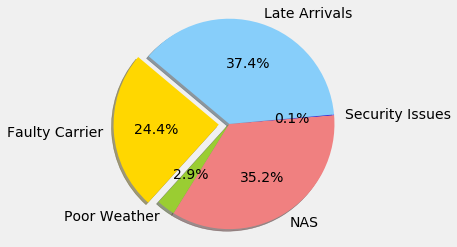

In [501]:
# Label the characteristics for the pie chart.
labels = ["Faulty Carrier", "Poor Weather", "NAS", "Security Issues", "Late Arrivals"]
sizes = [total_carrier_delays, total_weather_delays, total_nas_delays, total_security_delays, total_late_aircraft_delays]
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0)

# Create pie chart.
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')

### Flights over the years:

In [502]:
# Function to group by, select required columns and compute total number of flights

def aggr_group_df(df, group, aggr_field, fields):
    new_df = pd.DataFrame(df.groupby(by=group)[fields].sum())
    new_df[aggr_field] = new_df.apply(lambda row: sum(row[fields]), axis = 1)
    return new_df


In [503]:
FLIGHTS_AGGR_FIELDS = ['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted']
TOTAL_FLIGHTS_FIELD = 'total_flights'

In [504]:
# call function to group by year:

data_grouped_yr = aggr_group_df(data_atl, ['year'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)
data_grouped_yr

,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
year,,,,,
2010,414596.0,77891.0,9279.0,945.0,502711.0
2011,393051.0,69197.0,7484.0,812.0,470544.0
2012,391953.0,56370.0,2782.0,655.0,451760.0
2013,398882.0,72292.0,3450.0,655.0,475279.0
2014,369842.0,62396.0,6483.0,655.0,439376.0
2015,379498.0,55176.0,2752.0,1124.0,438550.0
2016,384252.0,49607.0,2350.0,736.0,436945.0
2017,364596.0,50392.0,5501.0,832.0,421321.0
2018,390079.0,60324.0,2611.0,752.0,453766.0


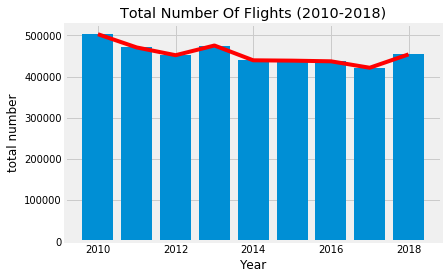

In [505]:
# Plot the graph
%matplotlib inline

x_axis = data_grouped_yr.index.values

plt.bar(x_axis, data_grouped_yr["total_flights"])
plt.plot(x_axis,data_grouped_yr["total_flights"],c="r")

plt.title('Total Number Of Flights (2010-2018)')
plt.xlabel('Year')
plt.ylabel('total number')

plt.savefig("Images/Total Number Of Flights(2010-2018).png")
plt.show()

### Total flights over months

In [506]:
# function to convert 'month' to month-names

def to_month_name (month_idx):
    month_name = calendar.month_abbr[month_idx]
    return month_name


In [507]:
data_atl['month_name'] = data_atl['month'].apply(to_month_name)
data_atl.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,month_name
0,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067.0,271.0,42.76,9.40,156.06,0.00,62.78,46.0,4.0,Jan
1,2010,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",524.0,75.0,31.23,8.31,19.42,0.00,16.04,21.0,2.0,Jan
2,2010,1,AS,Alaska Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",31.0,2.0,0.00,0.00,2.00,0.00,0.00,0.0,0.0,Jan
3,2010,1,CO,Continental Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",148.0,30.0,7.30,1.55,14.46,1.45,5.24,2.0,0.0,Jan
4,2010,1,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",12706.0,1925.0,463.26,73.66,933.45,2.00,452.63,370.0,37.0,Jan


In [508]:
# call function to group by month:
data_grouped_mnth = aggr_group_df(data_atl, ['month_name'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)

data_grouped_mnth.index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data_grouped_mnth

,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
Jan,291562.0,41927.0,3095.0,539.0,337123.0
Feb,307289.0,52433.0,3290.0,745.0,363757.0
Mar,279974.0,46375.0,4434.0,370.0,331153.0
Apr,259299.0,38920.0,7346.0,308.0,305873.0
May,280332.0,45933.0,9371.0,434.0,336070.0
Jun,307977.0,63745.0,2817.0,1406.0,375945.0
Jul,300786.0,62027.0,2875.0,1464.0,367152.0
Aug,301880.0,48244.0,3185.0,491.0,353800.0
Sep,300818.0,47835.0,1685.0,557.0,350895.0
Oct,278366.0,35713.0,846.0,217.0,315142.0


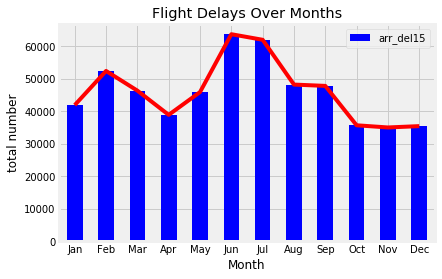

In [509]:
# plot

x_axis = data_grouped_mnth.index.values
data_grouped_mnth.plot.bar(x_axis, 'arr_del15', color='blue')
data_grouped_mnth['arr_del15'].plot(c='red')

plt.title('Flight Delays Over Months')
plt.xlabel('Month')
plt.ylabel('total number')

plt.savefig("Images/Flight Delays Over Months.png")
plt.show()


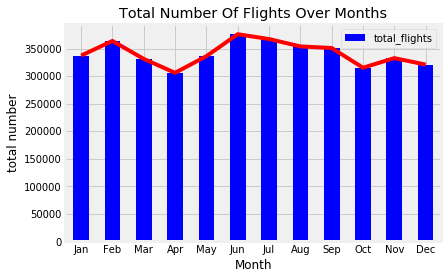

In [510]:
# plot

x_axis = data_grouped_mnth.index.values
data_grouped_mnth.plot.bar(x_axis, 'total_flights', color='blue')
data_grouped_mnth['total_flights'].plot(c='red')

plt.title('Total Number Of Flights Over Months')
plt.xlabel('Month')
plt.ylabel('total number')

plt.savefig("Images/Total Number Of Flights Over Months.png")
plt.show()


In [511]:
x_axis = data_grouped_mnth.index.values
x_axis

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

### Total number of flights over the years

In [512]:
# call function to group by year and carrier_name

carrier_over_years = aggr_group_df(data_atl, [ 'year', 'carrier_name'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)
carrier_over_years.head(20)

arr_flights  arr_del15  arr_cancelled  \
year carrier_name                                                          
2010 AirTran Airways Corporation       70773.0    10496.0          833.0   
     Alaska Airlines Inc.                365.0       41.0            0.0   
     American Airlines Inc.             5334.0     1028.0          103.0   
     American Eagle Airlines Inc.       3687.0      924.0          111.0   
     Atlantic Southeast Airlines      128270.0    24261.0         3271.0   
     Comair Inc.                        4617.0     1388.0          195.0   
     Continental Air Lines Inc.         1461.0      275.0           28.0   
     Delta Air Lines Inc.             172797.0    33298.0         4012.0   
     ExpressJet Airlines Inc.           4490.0     1155.0          100.0   
     Frontier Airlines Inc.             1059.0      241.0            4.0   
     Mesa Airlines Inc.                 1900.0      415.0           47.0   
     Pinnacle Airlines Inc.            13238.0     3013.0          461.0   
     SkyWest Airlines Inc.               994.0      306.0           27.0   
     US Airways Inc.                    5013.0      916.0           72.0   
     United Air Lines Inc.               598.0      134.0           15.0   
2011 AirTran Airways Corporation       69595.0     9117.0          902.0   
     Alaska Airlines Inc.                365.0       48.0            0.0   
     American Airlines Inc.             5294.0     1024.0          174.0   
     American Eagle Airlines Inc.       5210.0     1415.0          277.0   
     Atlantic Southeast Airlines      104611.0    23360.0         2907.0   

                                   arr_diverted  total_flights  
year carrier_name                                               
2010 AirTran Airways Corporation          193.0        82295.0  
     Alaska Airlines Inc.                   1.0          407.0  
     American Airlines Inc.                19.0         6484.0  
     American Eagle Airlines Inc.          13.0         4735.0  
     Atlantic Southeast Airlines          186.0       155988.0  
     Comair Inc.                            9.0         6209.0  
     Continental Air Lines Inc.             3.0         1767.0  
     Delta Air Lines Inc.                 431.0       210538.0  
     ExpressJet Airlines Inc.              25.0         5770.0  
     Frontier Airlines Inc.                 7.0         1311.0  
     Mesa Airlines Inc.                     7.0         2369.0  
     Pinnacle Airlines Inc.                33.0        16745.0  
     SkyWest Airlines Inc.                  4.0         1331.0  
     US Airways Inc.                       12.0         6013.0  
     United Air Lines Inc.                  2.0          749.0  
2011 AirTran Airways Corporation          159.0        79773.0  
     Alaska Airlines Inc.                   3.0          416.0  
     American Airlines Inc.                19.0         6511.0  
     American Eagle Airlines Inc.          13.0         6915.0  
     Atlantic Southeast Airlines          184.0       131062.0

In [513]:
#compute total number of flights per airline over the years

airlines_df = carrier_over_years.pivot_table(index='carrier_name', columns='year')['total_flights']
airlines_df = airlines_df.dropna(how='any')
airlines_df

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
carrier_name,,,,,,,,,
Alaska Airlines Inc.,407.0,416.0,513.0,798.0,689.0,572.0,856.0,876.0,751.0
American Airlines Inc.,6484.0,6511.0,6256.0,5984.0,5902.0,10291.0,14328.0,14479.0,14484.0
Delta Air Lines Inc.,210538.0,227160.0,227878.0,244600.0,262507.0,271949.0,274645.0,273860.0,278777.0
ExpressJet Airlines Inc.,5770.0,3424.0,117962.0,118022.0,91030.0,75295.0,67927.0,43563.0,10738.0
Frontier Airlines Inc.,1311.0,1235.0,1280.0,747.0,1717.0,6474.0,4813.0,4181.0,4381.0
SkyWest Airlines Inc.,1331.0,2510.0,2490.0,2785.0,3761.0,5687.0,7867.0,16684.0,29891.0
United Air Lines Inc.,749.0,758.0,1571.0,697.0,1363.0,4683.0,6582.0,6217.0,5816.0


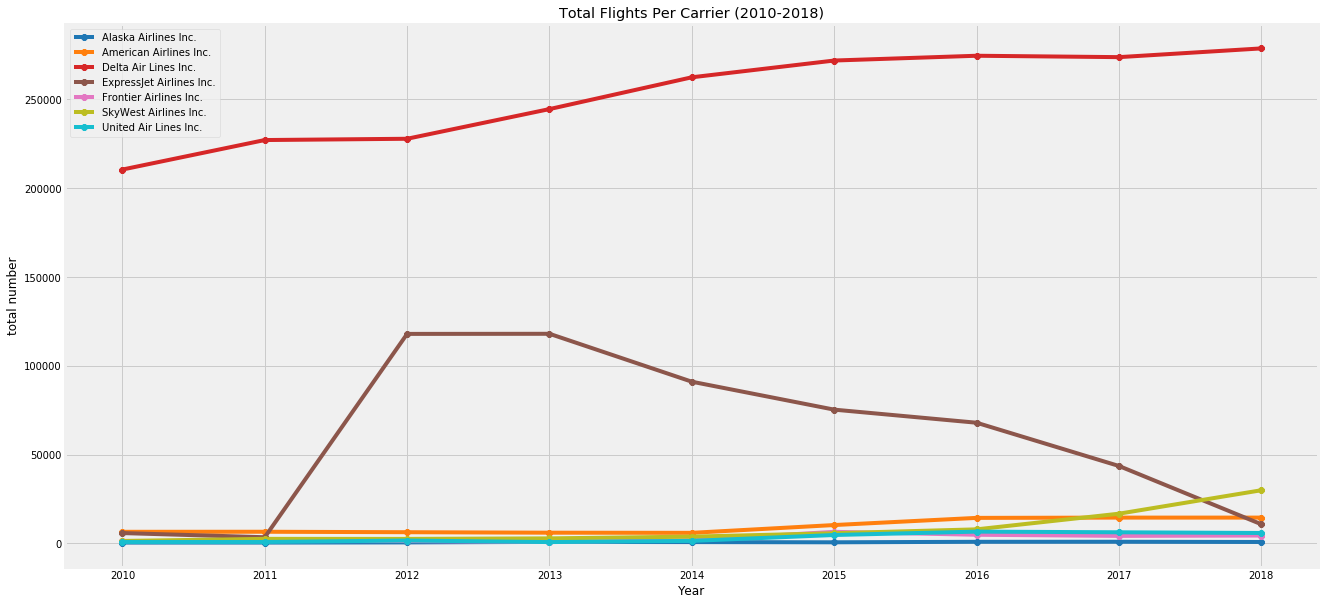

In [514]:
# plot

fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in airlines_df]

num_of_plots = len(airlines_df.index)
colormap = plt.cm.tab10
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

for index in airlines_df.index.values:
    airlines_df.loc[index,:].plot(kind='line', marker="8", linestyle='-')

plt.title('Total Flights Per Carrier (2010-2018)')
plt.xlabel('Year')
plt.ylabel('total number')

plt.legend(loc='best')
plt.savefig("Images/Total Number Of Flights Per Carrier(with null values).png")
plt.show()

## Flights on time

In [515]:
# airlines  - perecentage of flights on times 

ontime_arr_pct = pd.DataFrame((carrier_over_years['arr_flights'] / carrier_over_years['total_flights']) * 100)

ontime_arr_pct = ontime_arr_pct.pivot_table(index='carrier_name', columns='year')

ontime_arr_pct = ontime_arr_pct.dropna(how='any')[0]
ontime_arr_pct

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
carrier_name,,,,,,,,,
Alaska Airlines Inc.,89.680590,87.740385,92.007797,91.228070,88.388970,86.013986,89.719626,89.383562,90.679095
American Airlines Inc.,82.264035,81.308555,79.827366,80.815508,79.278211,82.343796,83.270519,82.243249,80.930682
Delta Air Lines Inc.,82.074020,84.940571,87.920291,86.227310,86.321508,89.226289,90.094850,88.534653,87.886375
ExpressJet Airlines Inc.,77.816291,77.803738,84.676421,81.692396,80.208722,82.476924,85.244454,84.020843,83.302291
Frontier Airlines Inc.,80.778032,81.538462,75.781250,73.092369,78.276063,77.618165,82.173281,81.248505,77.311116
SkyWest Airlines Inc.,74.680691,76.772908,81.285141,78.456014,76.070194,80.956568,83.818482,81.041717,82.168546
United Air Lines Inc.,79.839786,77.968338,80.394653,77.474892,76.595745,80.888319,84.624734,84.156346,82.977992


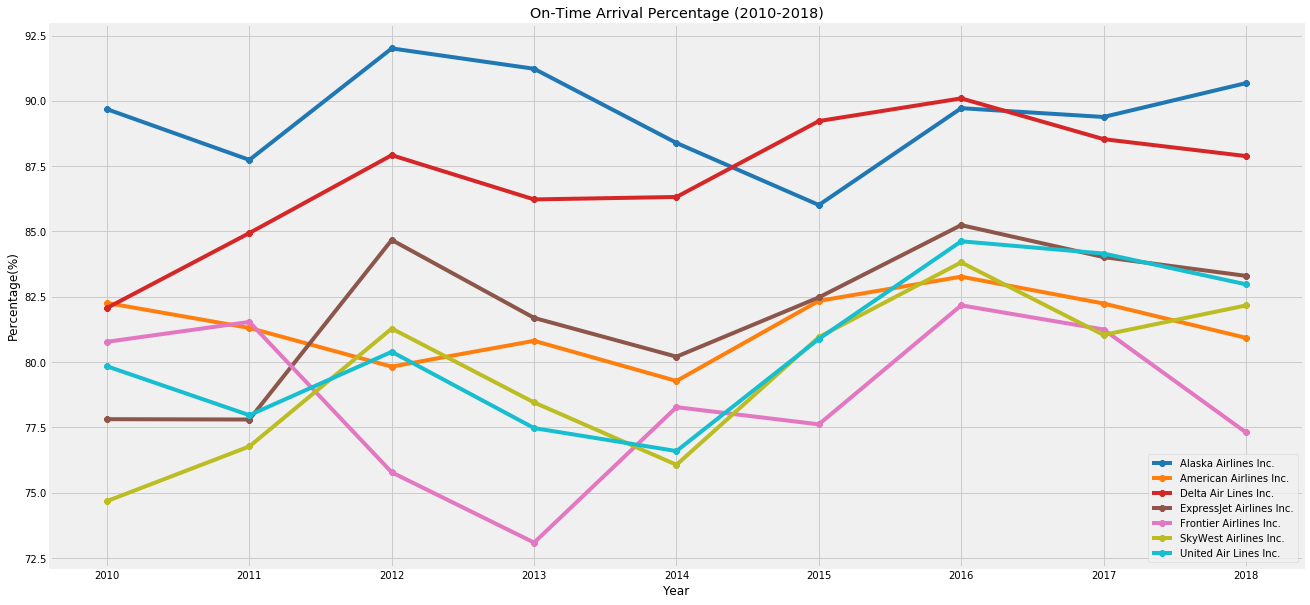

In [516]:
# plot

fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in ontime_arr_pct]

num_of_plots = len(airlines_df.index)
colormap = plt.cm.tab10
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

for airline in ontime_arr_pct.index.values:
    ontime_arr_pct.loc[airline,:].plot(kind='line', marker="8", linestyle='-')
    
plt.title('On-Time Arrival Percentage (2010-2018)')
plt.xlabel('Year')
plt.ylabel('Percentage(%)')

plt.legend(loc='best')
plt.savefig("On-time Arrival Percentage (2010-2018.png")
plt.show()


## Delay Analysis

In [517]:
delay_data = data_atl[['year','month','carrier','carrier_name','airport','airport_name','arr_flights','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted']]
delay_data = delay_data.dropna(how='any')

delay_data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067.0,271.0,42.76,9.40,156.06,0.00,62.78,46.0,4.0
1,2010,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",524.0,75.0,31.23,8.31,19.42,0.00,16.04,21.0,2.0
2,2010,1,AS,Alaska Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",31.0,2.0,0.00,0.00,2.00,0.00,0.00,0.0,0.0
3,2010,1,CO,Continental Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",148.0,30.0,7.30,1.55,14.46,1.45,5.24,2.0,0.0
4,2010,1,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",12706.0,1925.0,463.26,73.66,933.45,2.00,452.63,370.0,37.0


In [518]:
# groupdata by year:
delay_data = delay_data.groupby('year')[['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()
delay_data

,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
year,,,,,,
2010,77891.0,16303.07,2329.66,32885.30,73.27,26299.72
2011,69197.0,14822.94,1516.25,25926.55,51.16,26880.08
2012,56370.0,13447.57,1242.97,20620.89,50.12,21008.52
2013,72292.0,15779.03,2124.43,27456.47,65.16,26866.94
2014,62396.0,15564.53,1657.71,20717.72,40.91,24415.26
2015,55176.0,15762.03,1701.30,17394.94,64.33,20253.49
2016,49607.0,14631.21,1388.47,13829.93,47.97,19709.52
2017,50392.0,13936.09,1484.20,14830.83,76.46,20064.52
2018,60324.0,14790.81,2408.98,21210.89,74.34,21838.92


In [519]:
# function to find delay-percentage

def find_percentage(flight_delays, total_flight_delays):
        pct = (flight_delays / total_flight_delays) * 100
        return pct
   
        

In [520]:
# call function to find the various delay percentages

delay_data['carrier_ct%'] = delay_data.apply(lambda row: find_percentage(row['carrier_ct'], row['arr_del15']),axis=1)

delay_data['weather_ct%'] = delay_data.apply(lambda row: find_percentage(row['weather_ct'], row['arr_del15']),axis=1)

delay_data['nas_ct%'] = delay_data.apply(lambda row: find_percentage(row['nas_ct'], row['arr_del15']),axis=1)

delay_data['security_ct%'] = delay_data.apply(lambda row: find_percentage(row['security_ct'], row['arr_del15']),axis=1)

delay_data['late_aircraft_ct%'] = delay_data.apply(lambda row: find_percentage(row['late_aircraft_ct'], row['arr_del15']),axis=1)

        
delay_data


,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_ct%,weather_ct%,nas_ct%,security_ct%,late_aircraft_ct%
year,,,,,,,,,,,
2010,77891.0,16303.07,2329.66,32885.30,73.27,26299.72,20.930621,2.990923,42.219640,0.094067,33.764774
2011,69197.0,14822.94,1516.25,25926.55,51.16,26880.08,21.421362,2.191208,37.467737,0.073934,38.845730
2012,56370.0,13447.57,1242.97,20620.89,50.12,21008.52,23.855899,2.205020,36.581320,0.088913,37.268973
2013,72292.0,15779.03,2124.43,27456.47,65.16,26866.94,21.826800,2.938679,37.979956,0.090134,37.164472
2014,62396.0,15564.53,1657.71,20717.72,40.91,24415.26,24.944756,2.656757,33.203603,0.065565,39.129528
2015,55176.0,15762.03,1701.30,17394.94,64.33,20253.49,28.566823,3.083406,31.526280,0.116591,36.707065
2016,49607.0,14631.21,1388.47,13829.93,47.97,19709.52,29.494245,2.798940,27.878989,0.096700,39.731328
2017,50392.0,13936.09,1484.20,14830.83,76.46,20064.52,27.655362,2.945309,29.430922,0.151730,39.816876
2018,60324.0,14790.81,2408.98,21210.89,74.34,21838.92,24.518948,3.993402,35.161611,0.123235,36.202705


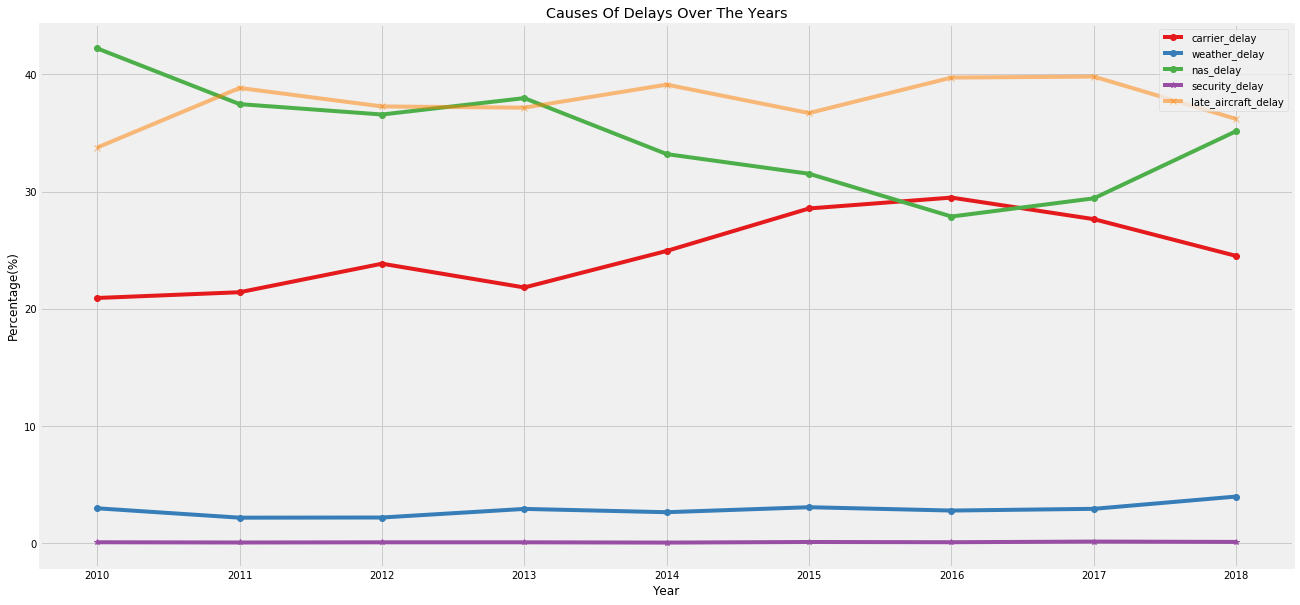

In [521]:
# plot

fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in delay_data.index.values]

num_of_plots = len(delay_data.index)
colormap = plt.cm.Set1
ax.set_color_cycle([colormap(i) for i in np.linspace(0,1,num_of_plots)])

ax1 = delay_data['carrier_ct%'].plot(marker='o', linestyle='-', label='carrier_delay')
ax2 = delay_data['weather_ct%'].plot(marker='o', linestyle='-',label='weather_delay')
ax3 = delay_data['nas_ct%'].plot(marker='o', linestyle='-',label='nas_delay')
ax4 = delay_data['security_ct%'].plot(marker='*', linestyle='-',label='security_delay')
ax5 = delay_data['late_aircraft_ct%'].plot(marker='x', linestyle='-',label='late_aircraft_delay', alpha=0.5)

plt.title('Causes Of Delays Over The Years')
plt.xlabel('Year')
plt.ylabel('Percentage(%)')
plt.legend()

plt.savefig("Images/Causes Of Delays Over The Years.png")
plt.show()


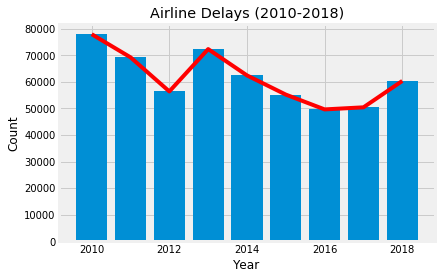

In [522]:
# airline conditions improved:

# Plot the graph
%matplotlib inline

x_axis = data_grouped_yr.index.values

plt.bar(x_axis, data_grouped_yr["arr_del15"])
plt.plot(x_axis,data_grouped_yr["arr_del15"], c="r")

plt.title('Airline Delays (2010-2018)')
plt.xlabel('Year')
plt.ylabel('Count')

plt.savefig("Images/Airline Delays(2010-2018).png")
plt.show()


In [523]:
# ontime arrival vs delays

data_grouped_yr


,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
year,,,,,
2010,414596.0,77891.0,9279.0,945.0,502711.0
2011,393051.0,69197.0,7484.0,812.0,470544.0
2012,391953.0,56370.0,2782.0,655.0,451760.0
2013,398882.0,72292.0,3450.0,655.0,475279.0
2014,369842.0,62396.0,6483.0,655.0,439376.0
2015,379498.0,55176.0,2752.0,1124.0,438550.0
2016,384252.0,49607.0,2350.0,736.0,436945.0
2017,364596.0,50392.0,5501.0,832.0,421321.0
2018,390079.0,60324.0,2611.0,752.0,453766.0


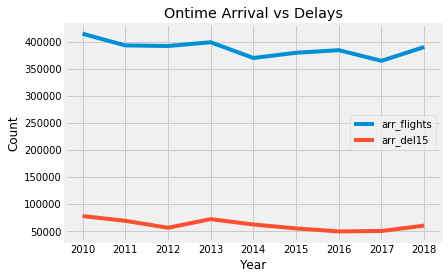

In [524]:
#plot

data_grouped_yr['arr_flights'].plot()
data_grouped_yr['arr_del15'].plot()

plt.title('Ontime Arrival vs Delays')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

plt.savefig("Images/Ontime Arrival vs Delays.png")
plt.show()

# Comparing four airports over the years

In [526]:
# extracting dataframes

lax_delays = aggr_group_df(data_lax, ['year'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)['arr_del15']
jfk_delays = aggr_group_df(data_jfk, ['year'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)['arr_del15']
chicago_delays = aggr_group_df(data_chicago, ['year'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)['arr_del15']
atl_delays = data_grouped_yr['arr_del15']


In [527]:
# creating dataframes:

airport_df = pd.DataFrame(index=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
                 data={'Lax Airport':lax_delays, 'JFK Airport':jfk_delays, 'CHICAGO Airport':chicago_delays, 'ATL Airport':atl_delays})

airport_df

,ATL Airport,CHICAGO Airport,JFK Airport,Lax Airport
2010,77891.0,59755.0,24068.0,34067
2011,69197.0,63815.0,20285.0,39972
2012,56370.0,55826.0,17017.0,39347
2013,72292.0,70470.0,25535.0,42920
2014,62396.0,77824.0,22254.0,47721
2015,55176.0,62123.0,21792.0,45714
2016,49607.0,44845.0,21128.0,49065
2017,50392.0,46519.0,23243.0,52056
2018,60324.0,67188.0,27454.0,40015


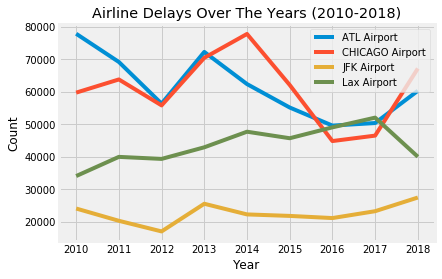

In [530]:
# plot:

#x_axis:
x = [x for x in df.index.values]

ax1 = plt.plot(x, airport_df['ATL Airport'])
ax2 = plt.plot(x, airport_df['CHICAGO Airport'])
ax3 = plt.plot(x, airport_df['JFK Airport'])
ax4 = plt.plot(x, airport_df['Lax Airport'])

plt.title('Airline Delays Over The Years (2010-2018)')
plt.xlabel('Year')
plt.ylabel('Count')


plt.legend()
plt.savefig("Images/Airline Delays Over The Years (2010-2018).png")
plt.show()



# Analyzing Arrivals vs Delays For Differnet Airports

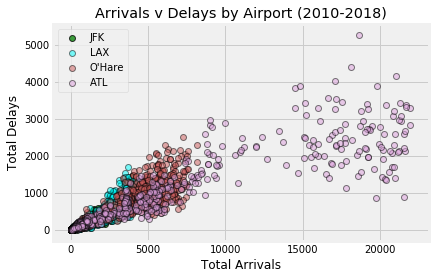

In [532]:
# Extracting each airport's dataframe
all_airports_df = pd.concat([data_lax,data_jfk,data_chicago,data_atl])

# plot
fig, ax = plt.subplots()
nyc_airport = all_airports_df[all_airports_df["airport"] == "JFK"]
lax_airport = all_airports_df[all_airports_df["airport"] == "LAX"]
chicago_airport = all_airports_df[all_airports_df["airport"] == "ORD"]
atl_airport = all_airports_df[all_airports_df["airport"] == "ATL"]

plt.scatter(nyc_airport["arr_flights"],nyc_airport["arr_del15"],c="green", edgecolors="black", alpha =.75, linewidths = 1, label = "JFK")
plt.scatter(lax_airport["arr_flights"],lax_airport["arr_del15"],c="cyan", edgecolors="black", alpha =.5, linewidths = 1, label = "LAX")
plt.scatter(chicago_airport["arr_flights"],chicago_airport["arr_del15"],c="indianred", edgecolors="black", alpha =.5, linewidths = 1, label = "O'Hare")
plt.scatter(atl_airport["arr_flights"],atl_airport["arr_del15"],c="plum", edgecolors="black", alpha =.5, linewidths = 1, label = "ATL")
plt.title('Arrivals v Delays by Airport (2010-2018)')
plt.xlabel('Total Arrivals')
plt.ylabel('Total Delays')
plt.legend()
plt.show()
plt.savefig("arrivals_vdelays_all_airports.jpg")
plt.show()




